# Shallow Neural Network using numpy

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Simple numpy codes

In [2]:
# Slicing
a = np.array([2,4,6,8,10])
b = np.array([1,3])
print(a[b])

[4 8]


In [3]:
## Numpy where
a = np.arange(10)
print(a)
np.where(a<5,a,10*a) # 조건 , True일때, False일때

[0 1 2 3 4 5 6 7 8 9]


array([ 0,  1,  2,  3,  4, 50, 60, 70, 80, 90])

In [4]:
# Slicing anumpy array with condition
a = np.array([2,4,6,8,10,12])
b = np.array([1,3])
print(a[a>5])
print(a[a%3==0])

[ 6  8 10 12]
[ 6 12]


## Data preparation

In [5]:
## XOR data
x_seeds = np.array([(0,0),(1,0),(0,1),(1,1)], dtype=float)
y_seeds = np.array([0,1,1,0])

N = 1000
idxs = np.random.randint(0,4,N)

X = x_seeds[idxs]
Y = y_seeds[idxs]

X += np.random.normal(scale = 0.25, size = X.shape)
print("X shape : " + str(X.shape) + "\nY shape : " + str(Y.shape))

X shape : (1000, 2)
Y shape : (1000,)


## Data Plotting

In [6]:
idxs_1 = np.where(Y==1)
idxs_0 = np.where(Y==0)

In [7]:
X_0 = X[idxs_0]
Y_0 = Y[idxs_0]
X_1 = X[idxs_1]
Y_1 = Y[idxs_1]

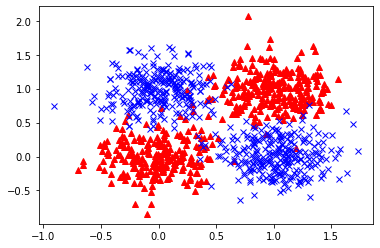

In [8]:
plt.plot(X_0[:,0],X_0[:,1],"r^")
plt.plot(X_1[:,0],X_1[:,1],"bx")
plt.show()

## Model

In [9]:
class shallow_neural_network():
    def __init__(self, num_input_features, num_hiddens):
        self.num_input_features = num_input_features
        self.num_hiddens = num_hiddens

        self.W1 = np.random.normal(size = (num_hiddens, num_input_features))
        self.b1 = np.random.normal(size = num_hiddens)
        self.W2 = np.random.normal(size = num_hiddens)
        self.b2 = np.random.normal(size = 1)
    
    def sigmoid(self,z):
        return 1/(1 + np.exp(-z))

    def predict(self,x):
        ## x.shape == (2,) , z1.shape == (3,)
        z1 = np.matmul(self.W1,x) + self.b1
        a1 = np.tanh(z1)   # (3,)
        z2 = np.matmul(self.W2,a1) + self.b2
        # z2.shape == (1,)
        a2 = self.sigmoid(z2)
        return a2, (z1,a1,z2,a2)

## Train & Test

In [10]:
def train(X,Y,model,lr = 0.1):
    dW1 = np.zeros_like(model.W1)
    db1 = np.zeros_like(model.b1)
    dW2 = np.zeros_like(model.W2)
    db2 = np.zeros_like(model.b2)

    # m training examples
    m = len(X)
    cost = 0.0

    for x,y in zip(X,Y):
        a2, (z1,a1,z2, _) = model.predict(x)
        if y == 1:
            cost -= np.log(a2)
        else: 
            cost -= np.log(1-a2)

        diff = a2 - y

        #layer 2 
        # db2
        db2 += diff

        # dW2
        dW2 += a1 * diff
        
        # layer 1
        # db1
        db1 += (1-a1**2)*model.W2*diff

        # dW1
        dW1 += np.outer((1-a1**2)*model.W2*diff,x)

    cost /= m
    model.W1 -= lr * dW1/m
    model.b1 -= lr * db1/m
    model.W2 -= lr * dW2/m
    model.b2 -= lr * db2/m

    return cost

In [12]:
import time
import math

model1 = shallow_neural_network(2,3)
start = time.time()
for epoch in range(100):
    cost = train(X,Y,model1,1.0)
    if epoch % 10 == 0:
        print(epoch,cost)
end = time.time()

print("(0,0) prediction : ",model1.predict((0,0))[0].item())
print("(0,1) prediction : ",model1.predict((0,1))[0].item())
print("(1,0) prediction : ",model1.predict((1,0))[0].item())
print("(1,1) prediction : ",model1.predict((1,1))[0].item())

print(f"{end - start:.5f} sec")

0 [1.31366715]
10 [0.58328191]
20 [0.5277066]
30 [0.469809]
40 [0.35193481]
50 [0.29239166]
60 [0.25527212]
70 [0.22950916]
80 [0.21128573]
90 [0.19815202]
(0,0) prediction :  0.021166248757306223
(0,1) prediction :  0.9542809048530243
(1,0) prediction :  0.9498079562707639
(1,1) prediction :  0.08495472245079536
3.62657 sec


In [13]:
# with no vectorization at all
def train2(X,Y,model,lr = 0.1):
    dW1 = np.zeros_like(model.W1)
    db1 = np.zeros_like(model.b1)
    dW2 = np.zeros_like(model.W2)
    db2 = np.zeros_like(model.b2)

    # m training examples
    m = len(X)
    cost = 0.0

    for x,y in zip(X,Y):
        a2, (z1,a1,z2, _) = model.predict(x)
        if y == 1:
            cost -= np.log(a2)
        else: 
            cost -= np.log(1-a2)

        diff = a2 - y

        #layer 2 
        # db2
        db2 += diff

        # dW2
        for i in range(model.num_hiddens):
            dW2[i] += a1[i]*diff


        # db1
        for i in range(model.num_hiddens):
            db1[i] += (1-a1[i]**2)*model.W2[i]*diff


        # dW1
        for i in range(model.num_hiddens):
            for j in range(model.num_input_features):
                dW1[i,j] += x[j]*(1-a1[i]**2)*model.W2[i]*diff


    cost /= m
    model.W1 -= lr * dW1/m
    model.b1 -= lr * db1/m
    model.W2 -= lr * dW2/m
    model.b2 -= lr * db2/m

    return cost

In [14]:
import time
import math

model_org = shallow_neural_network(2,3)
start1 = time.time()
for epoch in range(100):
    cost = train2(X,Y,model_org,1.0)
    if epoch % 10 == 0:
        print(epoch,cost)
end1 = time.time()

model = shallow_neural_network(2,3)
start2 = time.time()
for epoch in range(100):
    cost = train(X,Y,model,1.0)
    if epoch % 10 == 0:
        print(epoch,cost)
end2 = time.time()

print("------------no vectorization model-----------")
print("(0,0) prediction : ",model_org.predict((0,0))[0].item())
print("(0,1) prediction : ",model_org.predict((0,1))[0].item())
print("(1,0) prediction : ",model_org.predict((1,0))[0].item())
print("(1,1) prediction : ",model_org.predict((1,1))[0].item())

print(f"no vectorization model time : {end1 - start1:.5f} sec")

print("------------vectorization model-----------")
print("(0,0) prediction : ",model.predict((0,0))[0].item())
print("(0,1) prediction : ",model.predict((0,1))[0].item())
print("(1,0) prediction : ",model.predict((1,0))[0].item())
print("(1,1) prediction : ",model.predict((1,1))[0].item())

print(f"vectorization model time : {end2 - start2:.5f} sec")

0 [1.47225551]
10 [0.63210296]
20 [0.57298102]
30 [0.49754483]
40 [0.40528483]
50 [0.32854909]
60 [0.2783074]
70 [0.24687197]
80 [0.2263986]
90 [0.21234805]
0 [0.99392301]
10 [0.68905705]
20 [0.66464217]
30 [0.63283193]
40 [0.59428745]
50 [0.55785556]
60 [0.53051036]
70 [0.51137146]
80 [0.49779209]
90 [0.48781001]
------------no vectorization model-----------
(0,0) prediction :  0.05801887052654909
(0,1) prediction :  0.9724459000463227
(1,0) prediction :  0.9028647878957113
(1,1) prediction :  0.05285805743949728
no vectorization model time : 6.20902 sec
------------vectorization model-----------
(0,0) prediction :  0.08980317031261985
(0,1) prediction :  0.9350147931369456
(1,0) prediction :  0.4971083985571043
(1,1) prediction :  0.5189923223692029
vectorization model time : 3.62427 sec
